## Predicting House Prices in CT

Can we predict the house price in CT?

Data is scrapped from Zillow and collected in CT_houses.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)


df = pd.read_csv('CT_houses.csv')
df=df.dropna()

df.head()



,address,city,state,zip,sqft,price_sqft,total_price,bathrooms,bedrooms,zpid,latitude,longitude,sale_date,year_Built
0,4 Centerbrook Ct,AVON,CT,6001,1763,138,243294,4,3,59045026,41.770925,-72.887230,09/28/2018,1998
1,14 Beechwood Holw,AVON,CT,6001,3782,202,763964,4,4,123856941,41.778910,-72.873198,09/27/2018,2017
2,3 Arlington Dr,AVON,CT,6001,2310,195,450450,3,4,68976060,41.782052,-72.915885,09/21/2018,2005
3,20 Maple Ln,Avon,CT,6001,1306,71,92726,2,2,174218357,41.771661,-72.877724,09/21/2018,1976
4,9 Arlington Dr,Avon,CT,6001,4436,133,589988,4,4,174214693,41.782516,-72.917067,09/20/2018,2006


There is quite a lot of columns here so lets cut down to the core important features that we can use

In [2]:
df=df[['total_price','sqft', 'bathrooms','bedrooms','year_Built','sale_date','zip', 'latitude','longitude']]

df.head()

,total_price,sqft,bathrooms,bedrooms,year_Built,sale_date,zip,latitude,longitude
0,243294,1763,4,3,1998,09/28/2018,6001,41.770925,-72.887230
1,763964,3782,4,4,2017,09/27/2018,6001,41.778910,-72.873198
2,450450,2310,3,4,2005,09/21/2018,6001,41.782052,-72.915885
3,92726,1306,2,2,1976,09/21/2018,6001,41.771661,-72.877724
4,589988,4436,4,4,2006,09/20/2018,6001,41.782516,-72.917067


In looking for inspiration I found a similar kaggle competition. 
The author suggested removing properties with sqft > 400. 
This number is arbitary so lets have a look at the distribution, mean and interquartile range
and remove large plots that are rare. 

count    32483.000000
mean      1974.371487
std       1185.482075
min        346.000000
25%       1262.000000
50%       1716.000000
75%       2410.000000
max      99999.000000
Name: sqft, dtype: float64

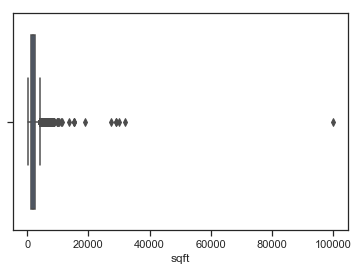

In [3]:
box_sqft=sns.boxplot(df['sqft'])
df['sqft'].describe()


Wow there are some really big plots.
Lets remove the plots that are outside 1.5* Interquartile Range. 

skew 0.800104692913219
kurtosis -0.02333420696240296


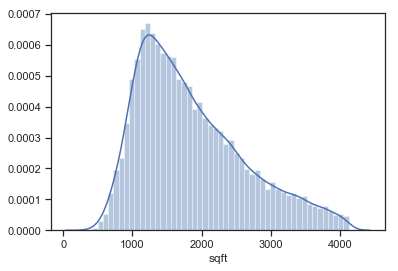

In [4]:
IQR=2410.0-1262.0
out1=1262-1.5*IQR
out2=2410+1.5*IQR
df=df[df.sqft < out2]
df=df[df.sqft > out1]
cut_sqft=sns.distplot(df['sqft'])
print('skew',df['sqft'].skew())
print('kurtosis',df['sqft'].kurtosis())

The skew tells us about the lack of symmetry in the distrubution. 

A skew of 0.8 shows there is a lot of data right to the peak. 

A small kurtosis shows that we don't have a long tail anymore. 

Lets look at the next feature- number of bathrooms

count    31349.000000
mean         2.121535
std          0.885440
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: bathrooms, dtype: float64

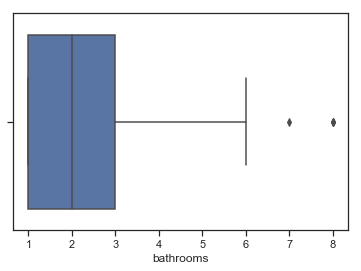

In [5]:
box_bath=sns.boxplot(df['bathrooms'])
df['bathrooms'].describe()


We don't have enough data to predict house prices above 6 bathrooms so lets remove those points

skew 0.4961497735271591
kurtosis -0.07954460037151767


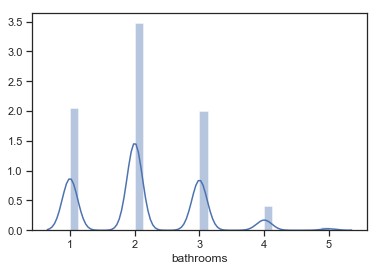

In [6]:

df=df[df.bathrooms < 6]
#df=df[df.bathrooms > out1]

cut_bath=sns.distplot(df['bathrooms'])
print('skew',df['bathrooms'].skew())
print('kurtosis',df['bathrooms'].kurtosis())

Is there a trend with house price and number of bathrooms?

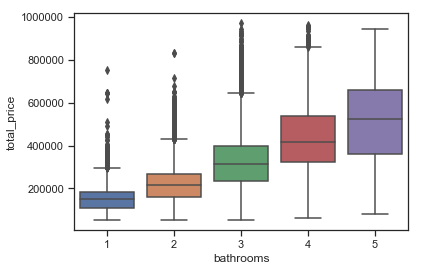

In [7]:
sns.boxplot(x="bathrooms", y="total_price", data=df)

Yes there is certainly a trend but the houses with fewer bathrooms have a lot more data points that are outside of the interquartile range. 

Removing these points will increase the accuracy. The downside is that our model becomes less generalizable. This is acceptable for our case. 

In [8]:
bath1=df[(df.bathrooms == 1)]

#print (bath1['total_price'].describe())
bath2=df[(df.bathrooms==2)]
#print (bath2['total_price'].describe())

bath3=df[(df.bathrooms == 3)]
#print (bath3['total_price'].describe())

bath4=df[(df.bathrooms==4)]
print (bath4['total_price'].describe())
bath5=df[(df.bathrooms==4)]

count      1598.000000
mean     437173.600751
std      171012.437229
min       62958.000000
25%      321463.750000
50%      414484.000000
75%      537075.000000
max      964320.000000
Name: total_price, dtype: float64


In [9]:
Q1=321463.750000
Q3=537075.000000
IQR=Q3-Q1
out1=Q1-1.5*IQR
out2=Q3+1.5*IQR
print (out1, out2)

-1953.125 860491.875


In [10]:
df=df.drop(df[(df.bathrooms == 1)& (df.total_price > 205881.75)].index)
df=df.drop(df[(df.bathrooms == 2)& (df.total_price > 428969.25)].index)
df=df.drop(df[(df.bathrooms == 3)& (df.total_price > 645300.0)].index)
df=df.drop(df[(df.bathrooms == 4)& (df.total_price > 860491.875)].index)


Now lets do the same thing for number of bedrooms

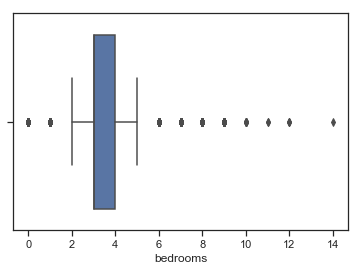

In [11]:
sns.boxplot(x="bedrooms", data=df)


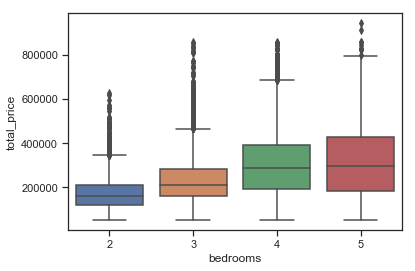

In [12]:
df=df[df.bedrooms >= 2]
df=df[df.bedrooms < 6]
sns.boxplot(x="bedrooms", y="total_price", data=df)

In [13]:
bed2=df[(df.bedrooms == 2)]
bed3=df[(df.bedrooms == 3)]
bed4=df[(df.bedrooms == 4)]
bed5=df[(df.bedrooms == 5)]
print(bed5['total_price'].describe())



count      1332.000000
mean     322968.073574
std      168459.866283
min       52286.000000
25%      184830.750000
50%      294420.000000
75%      428725.000000
max      945760.000000
Name: total_price, dtype: float64


In [14]:
#Q1=189253.250000
#Q3=447881.500000
#IQR=Q3-Q1
#out=Q3+1.5*IQR
#print (out)
df=df.drop(df[(df.bedrooms == 2)& (df.total_price > 368139.375)].index)
df=df.drop(df[(df.bedrooms == 3)& (df.total_price > 457887.5)].index)
df=df.drop(df[(df.bedrooms == 4)& (df.total_price > 711450.75)].index)
df=df.drop(df[(df.bedrooms == 5)& (df.total_price > 835823.875)].index)


Is there a trend between year built and the price?

Maybe we need to get rid of very old houses that have been completely refurbished and look new. 

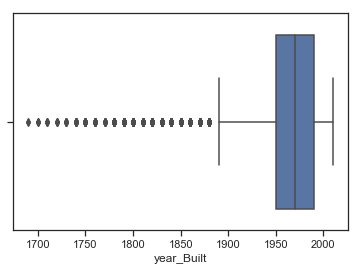

In [16]:
df = df[df.year_Built < 2010] # want categories of every 10 years and only have 7 years from 2010-2020

df.year_Built = df.year_Built.apply(lambda x: int(np.ceil(x / 10.0)) * 10 )
sns.boxplot(x="year_Built", data=df)
df['year_Built'].describe()
df=df.drop(df[df.year_Built < 1890].index)


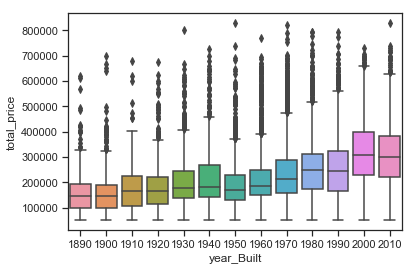

In [17]:
sns.boxplot(x="year_Built",y='total_price',data=df)
#does year Built indicate condition of property?

There doesn't appear to be much of a trend so lets not throw out data

Does seasonality affect house prices?

In [18]:
today=pd.to_datetime('10/12/2018',format='%m/%d/%Y')
        
df.sale_date = df.sale_date.apply(lambda x: str(today-timedelta(int(x.split(' ')[0]))) if 'ago' in str(x) else str(x))

df['sale_date']=pd.to_datetime(df['sale_date'])

def get_month(date):
    return date.month

def get_season(month):
    if month <= 2  or month ==12:
        season=1 # winter
    elif month >=3 and month <=5:
        season =2 # spring
    elif month >=6 and month <=8:
        season =3 # summer
    elif month >=8 and month<=11:
        season =4 # fall
    else:
        print ('no season', month)
        season='0'
    return season

df['Month_sold'] = df.sale_date.apply(get_month)
df['Season_sold'] =df.Month_sold.apply(get_season)

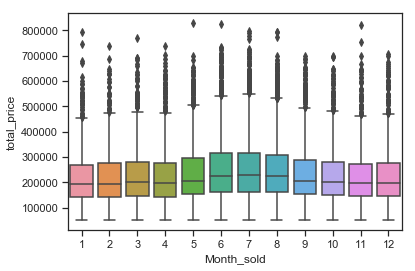

In [19]:
sns.boxplot(x="Month_sold",y='total_price',data=df)

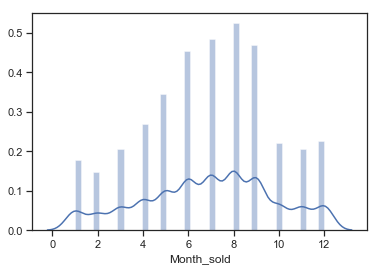

In [20]:
sns.distplot(df['Month_sold'])

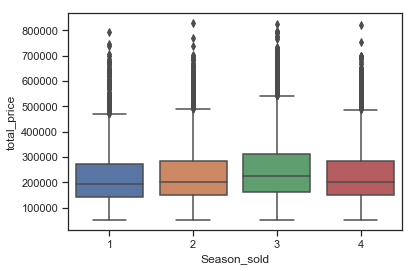

In [21]:
sns.boxplot(x="Season_sold",y='total_price',data=df)

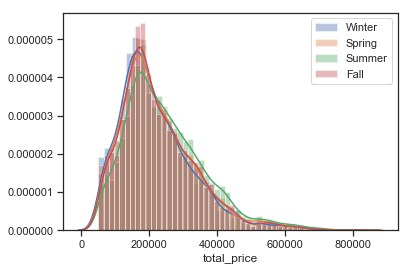

In [22]:
S1=df[(df.Season_sold == 1)]
S2=df[(df.Season_sold == 2)]
S3=df[(df.Season_sold == 3)]
S4=df[(df.Season_sold == 4)]
sns.distplot(S1['total_price'],label='Winter')
sns.distplot(S2['total_price'],label='Spring')
sns.distplot(S3['total_price'],label='Summer')
sns.distplot(S4['total_price'],label='Fall')
plt.legend()

It doesn't look like seasonality has a huge effect. This may be due to a lack of historical data. 

What about location? Can we use the coordinates?


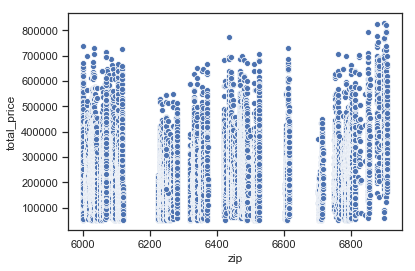

In [23]:
sns.scatterplot(x="zip",y='total_price',data=df)

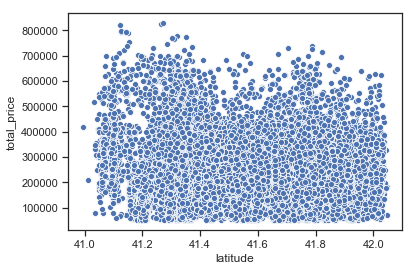

In [24]:
sns.scatterplot(x="latitude",y='total_price',data=df)

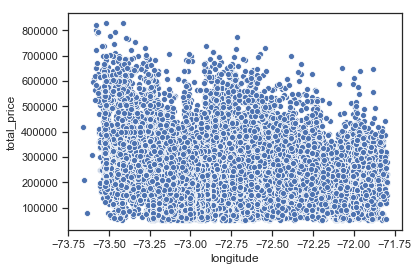

In [25]:
sns.scatterplot(x="longitude",y='total_price',data=df)

Coordinates do not seem to be correlated

Lets look at what we are trying to predict

skew 1.0651421730747015
kurtosis 1.4810758151980492


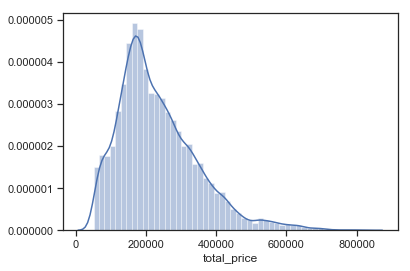

In [60]:
sns.distplot(df['total_price'])
print('skew',df['total_price'].skew())
print('kurtosis',df['total_price'].kurtosis())

There is a positive skew and a positive kurtosis showing a large tail.
It will be hard to predict house prices over $500,000 due to a lack of data. 
Lets see what we can do. 

## Summary of assumptions 

sqft < 4132.0

bathrooms < 6

bedrooms > 2 and bedrooms < 6

removed outliers with respect to total price 


In [40]:
dfcorr = df.corr(method='pearson')['total_price']
dfcorr = pd.DataFrame(dfcorr)
dfcorr.columns = ["Correlation"]
dfcorr2 = dfcorr.sort_values(by=['Correlation'], ascending=False)
print(dfcorr2)

             Correlation
total_price     1.000000
sqft            0.719009
bathrooms       0.683390
bedrooms        0.448105
year_Built      0.343369
zip             0.111937
Season_sold     0.035557
Month_sold      0.013724
latitude       -0.141666
longitude      -0.188485


Price is correlated to the size of house, number of bathrooms and number of bedrooms but harder to correlate with location. This is surprising as anyone who sells a house says "location, location, location!". 

For now we will not do anything but if we want to increase the accuracy we may want to engineer a location feature. 

Lets start modelling! 
First step is split data into train and test set. 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


y=df['total_price']

# include independent features

x=df[['sqft', 'bathrooms','bedrooms','year_Built','Season_sold','latitude','longitude']]
#x=df[['sqft', 'bathrooms','bedrooms','year_Built', 'zip', 'Season_sold']]
    
X_train, X_test, y_train, y_test = train_test_split(x, y)
print ("Number of data points in training:", len(y_train))
print ("Number of data points in test:", len(y_test)) 

Number of data points in training: 18479
Number of data points in test: 6160


Lets do a linear regression model. We can play with regularization. Ridge vs Lasso?

In [53]:
model = linear_model.Ridge()
model.fit( X_train , y_train )
mscore_train=model.score(X_train, y_train)
mscore_test=model.score(X_test,y_test)
y_pred_train = model.predict(X_train)
mape=mean_absolute_percentage_error(y_train,y_pred_train)
print ("r sq value (training) :", mscore_train)
print ("r sq value (test): ", mscore_test)
print ("mean absolute percentage error :",MAPE)

r sq value (training) : 0.6247636823211853
r sq value (test):  0.6088195917832218
mean absolute percentage error : 30.23897385800476


In [55]:
lmodel = linear_model.Lasso()
lmodel.fit( X_train , y_train )
lmscore_train= (lmodel.score(X_train, y_train))
lmscore_test =(lmodel.score(X_test,y_test))
lasso_pred_train=lmodel.predict(X_train)
lmape=mean_absolute_percentage_error(y_train,lasso_pred_train)
print ("r sq value (training) :", lmscore_train)
print ("r sq value (test): ", lmscore_test)
print ("mean absolute percentage error :",lmape)

r sq value (training) : 0.6247636909512582
r sq value (test):  0.608819007982613
mean absolute percentage error : 30.23918221625396


30% percentage error is quite bit high. Ridge and Lasso are similar. 

What about Gradient boosting?

In [57]:
from sklearn import ensemble

gmodel=ensemble.GradientBoostingRegressor(max_depth=5)
gmodel.fit(X_train, y_train)
gscore_train=gmodel.score(X_train,y_train)
gscore_test=gmodel.score(X_test,y_test)
gy_pred_train=gmodel.predict(X_train)
gmape=mean_absolute_percentage_error(y_train,gy_pred_train)
print ("r sq value (training) :", gscore_train)
print ("r sq value (test): ", gscore_test)
print ("mean absolute percentage error :",gmape)

r sq value (training) : 0.8055326434885854
r sq value (test):  0.7540268131912828
mean absolute percentage error : 21.72830536506132


Gradient boosting is awesome! Decrease by about 10%. 
Is it overkill? Would RandomForest been ok?

In [59]:
from sklearn.ensemble import RandomForestRegressor
rfmodel=ensemble.RandomForestRegressor(max_depth=5)
rfmodel.fit(X_train, y_train)
rfscore_train=rfmodel.score(X_train,y_train)
rfscore_test=rfmodel.score(X_test,y_test)
rf_pred_train=rfmodel.predict(X_train)
rmape=mean_absolute_percentage_error(y_train,rf_pred_train)
print ("r sq value (training) :", rfscore_train)
print ("r sq value (test): ", rfscore_test)
print ("mean absolute percentage error :",rmape)

r sq value (training) : 0.6781901536194179
r sq value (test):  0.6547540408368775
mean absolute percentage error : 27.676200013348534


# Concluding thoughts

 Gradient Boosting Regressor gives the highest r squared values and lowest mean absolute percentage error.
 External validation by comparing to Kaggle house price solutions (different data set)
 find similar accuracy. 
 The error is still approximately 20% which is rather high to make an accurate prediction to sell a house. 

 Sqft, bathrooms and bedrooms are moderately - strongly correlated with total sale price
 Features describing location and when the property sold are more weakly correlated. 
 Surprised that location is a weak correlator. 

 Tried looking at combined total of bathrooms + bedrooms but this was less well correlated than n.bathrooms
 Also looked at the bathroom/bedroom ratio. 

 The strength of the Gradient Boosting Regressor is in dealing with the weakly correlated features.

 To improve the model further could try to include the following:
 Distance to New York could be strongly correlated with total price but hard to tell from latitude
 Also zip codes may have large variations due to geographic features such as waterfront property 
 Overal quality and condition of the property may be a better indicator than age built

